# Footprint

Hint-ATAC/TOBIAS corrected and uncorrected footprints at sets of motifs of interest.

In [15]:
import pyBigWig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
octsox = pd.read_csv("../20210520_spacing_in_data/scanning/tfmodisco_cluster_idx4_gc_neg_peak_set_8_10_11_13/high_OSK.not.fibr.1000.OCTSOX.top_oneperc_imp.bed",
           sep='\t',
           names=['chr', 'start', 'end', 'strand', 'score', 'seq'])
octsox

,chr,start,end,strand,score,seq
0,chr1,840140,840154,-,7.240431,ATATACTTGACAATA
1,chr1,1191779,1191793,+,6.785524,TATAGATATTCAGTT
2,chr1,1638777,1638791,+,6.882483,CTTTATTATGAAACA
3,chr1,1801922,1801936,-,7.472690,ATTAGTATCAGAAAA
4,chr1,1828464,1828478,-,6.104234,ATGTACACAACAATC
...,...,...,...,...,...,...
145611,chrY,19739845,19739859,-,6.468541,CACAGAATATGAAAG
145612,chrY,20587098,20587112,-,6.338637,GTTGGCATTAGAAAC
145613,chrY,20599898,20599912,-,6.819207,TTCAACATCACTATG
145614,chrY,20600114,20600128,+,8.457754,AATTCAAATTGAAAT


In [8]:
octsox.shape

(145616, 6)

In [9]:
raw_cutsites = pyBigWig.open("/users/surag/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx4.bw")
corr_cutsites = pyBigWig.open("./20201020_n62402/hint_output/cluster_idx4.bw")

In [54]:
fibr_raw_cutsites = pyBigWig.open("/users/surag/oak/projects/scATAC-reprog/clusters/20201020_n62402/bigwigs/cluster_idx5.bw")

In [90]:
fibr_corr_cutsites = pyBigWig.open("./20201020_n62402/hint_output/D0.c4.peaks.bw")

In [95]:
cur_raw = []
cur_corr = []
cur_fibr_raw = []
cur_fibr_corr = []

for i,x in octsox.iterrows():
    if x['strand'] == "+" and 6<x['score']>10:
        cur_raw.append(np.nan_to_num(raw_cutsites.values(x['chr'], x['start']-40, x['end']+40)))
        cur_corr.append(np.nan_to_num(corr_cutsites.values(x['chr'], x['start']-40, x['end']+40)))
        cur_fibr_raw.append(np.nan_to_num(fibr_raw_cutsites.values(x['chr'], x['start']-40, x['end']+40)))        
        cur_fibr_corr.append(np.nan_to_num(fibr_corr_cutsites.values(x['chr'], x['start']-40, x['end']+40)))

In [96]:
len(cur_raw)

3813

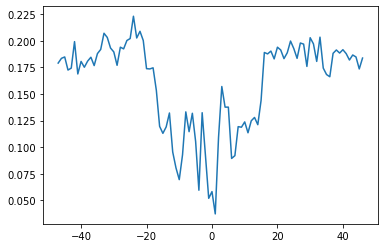

In [97]:
plt.plot(range(-len(cur_raw[0])//2, len(cur_raw[0])//2), 
         np.array(cur_raw).mean(0))

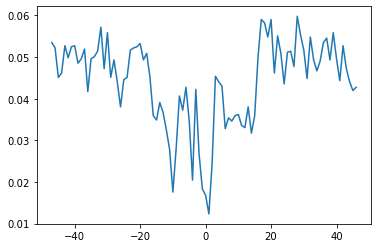

In [98]:
plt.plot(range(-len(cur_raw[0])//2, len(cur_raw[0])//2), 
         np.array(cur_fibr_raw).mean(0))

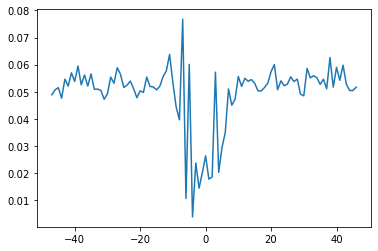

In [99]:
plt.plot(range(-len(cur_raw[0])//2, len(cur_raw[0])//2), 
         np.array(cur_fibr_corr).mean(0))

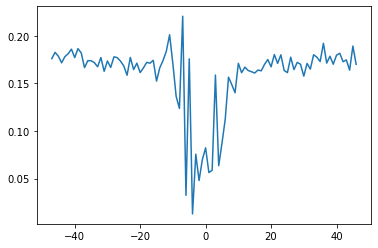

In [100]:
plt.plot(range(-len(cur_raw[0])//2, len(cur_raw[0])//2), 
         np.array(cur_corr).mean(0))

Doesn't look like it's correcting properly since OCTSOX peaks in fibroblast non-peaks have footprint.

In [ ]:
TTTTGTTATGCAAAT

In [70]:
"TTTTGTTATGCAAAT"[7:10]

'ATG'

In [69]:
x['seq'][7:1]

'ACA'

## TOBIAS

In [101]:
corr_cutsites = pyBigWig.open("./20201020_n62402/tobias/ATACorrect_bw/cluster_idx4_corrected.bw")
fibr_corr_cutsites = pyBigWig.open("./20201020_n62402/tobias/ATACorrect_bw/D0_corrected.bw")

<AxesSubplot:>

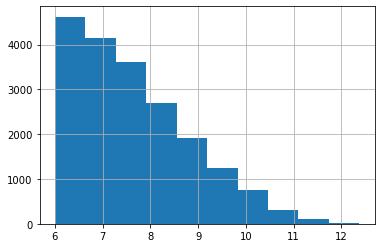

In [129]:
pd.Series([x['score'] for _,x in octsox.iterrows() if x['strand']=="+" and x['seq'][7:10]=="ATT"]).hist()

In [137]:
[1,2,3][::1]

[1, 2, 3]

In [236]:
cur_raw = []
cur_corr = []
cur_fibr_raw = []
cur_fibr_corr = []
WID=100

for i,x in octsox.iterrows():
    if x['score']<8 and x['strand']=="+":
#         if (x['strand']=="+" and x['seq'][7:10]=="ATT") or \
#             (x['strand']=='-' and x['seq'][5:8]=="AAT"):

            rev = 1 if x['strand']=="+" else -1
            cur_raw.append(np.nan_to_num(raw_cutsites.values(x['chr'], x['start']-WID, x['end']+WID))[::rev])
            cur_corr.append(np.nan_to_num(corr_cutsites.values(x['chr'], x['start']-WID, x['end']+WID))[::rev])
            cur_fibr_raw.append(np.nan_to_num(fibr_raw_cutsites.values(x['chr'], x['start']-WID, x['end']+WID))[::rev])        
            cur_fibr_corr.append(np.nan_to_num(fibr_corr_cutsites.values(x['chr'], x['start']-WID, x['end']+WID))[::rev])

In [237]:
len(cur_raw)

48719

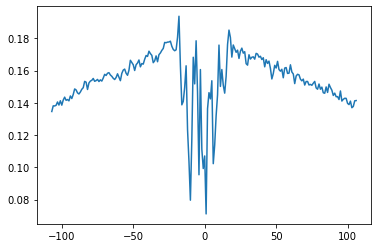

In [238]:
plt.plot(range(-len(cur_raw[0])//2, len(cur_raw[0])//2), 
         np.array(cur_raw).mean(0))

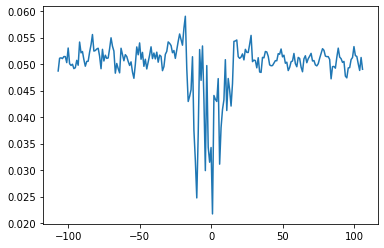

In [239]:
plt.plot(range(-len(cur_raw[0])//2, len(cur_raw[0])//2), 
         np.array(cur_fibr_raw).mean(0))

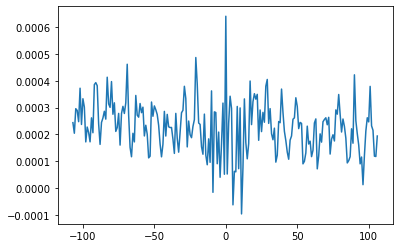

In [240]:
plt.plot(range(-len(cur_raw[0])//2, len(cur_raw[0])//2), 
         np.array(cur_fibr_corr).mean(0))

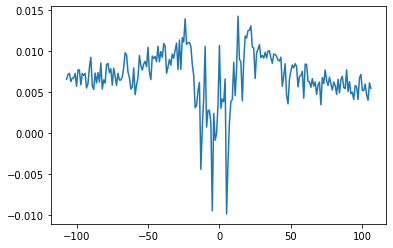

In [241]:
plt.plot(range(-len(cur_raw[0])//2, len(cur_raw[0])//2), 
         np.array(cur_corr).mean(0))

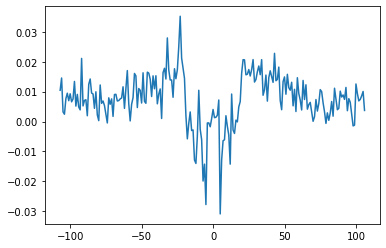

In [229]:
plt.plot(range(-len(cur_raw[0])//2, len(cur_raw[0])//2), 
         np.array(cur_corr).mean(0))